# Solution — Hierarchical clustering and Silhouette

We will:
1. Load `day5_example.csv`.
2. Plot a **clustermap** (heatmap + dendrograms) with group colors.
3. Compute **silhouette plots** for **k = 2,3,4,5** (Agglomerative / Ward) and select the best `k` by average silhouette.


In [2]:
# 1. Load the dataset
import pandas as pd

df = pd.read_csv("../data/day5_example.csv")
y = df['group']
X = df[['Gene1','Gene2','Gene3']]
df.head()

,group,Gene1,Gene2,Gene3
0,A,0.524097,-0.047710,-0.545653
1,A,-2.260768,-1.519615,-0.398969
2,A,-0.019680,0.794936,0.585381
3,A,0.183140,-0.144233,0.163862
4,A,-0.361351,-0.706498,0.141025


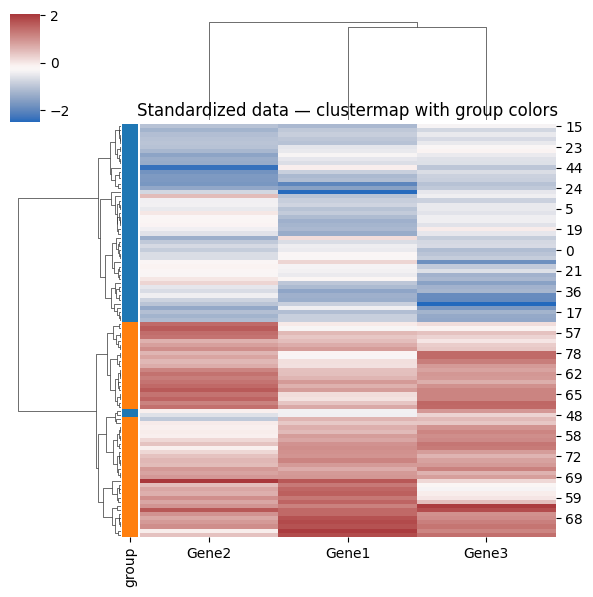

In [3]:
# 2. Heatmap + dendrograms with group colors (standardize features first)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
Xz = scaler.fit_transform(X)
Xz_df = pd.DataFrame(Xz, columns=X.columns, index=df.index)

groups = y.unique()
palette = sns.color_palette(n_colors=len(groups))
lut = dict(zip(groups, palette))
row_colors = y.map(lut)

g = sns.clustermap(Xz_df, row_colors=row_colors, cmap="vlag", metric="euclidean", method="ward",
                   figsize=(6,6))
g.ax_heatmap.set_title("Standardized data — clustermap with group colors")
plt.show()

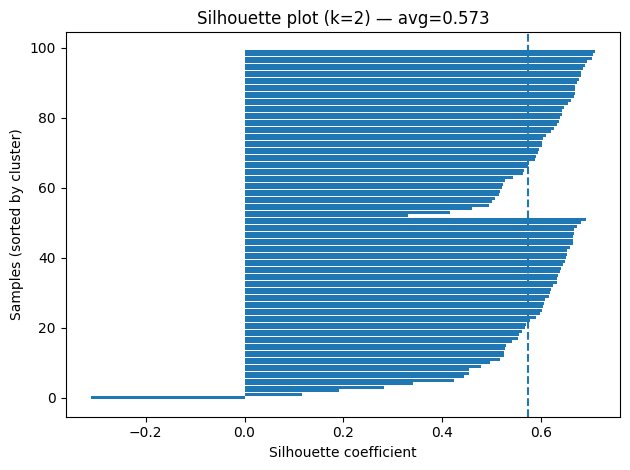

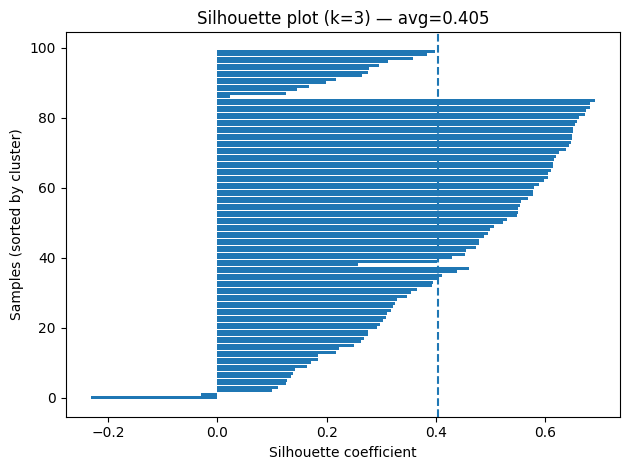

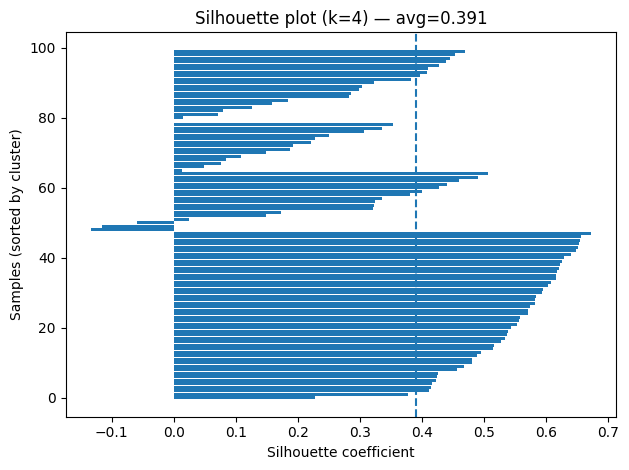

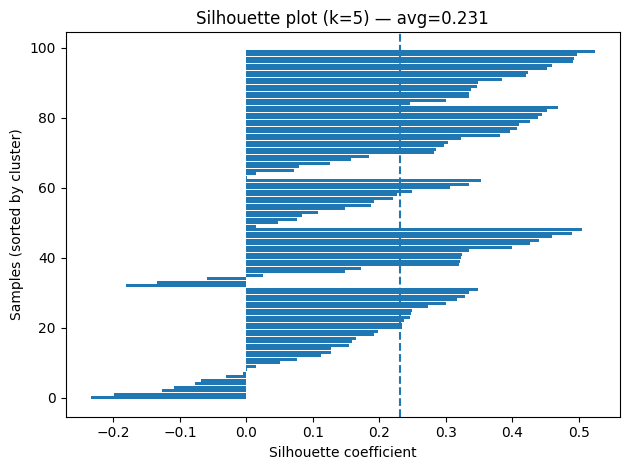

Average silhouette by k: {2: 0.5731397428112283, 3: 0.4045881836570461, 4: 0.39075336693137475, 5: 0.23092338914698793}
=> Best k = 2


In [4]:
# 3. Silhouette plots for k = 2, 3, 4, 5
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

Ks = [2,3,4,5]
sil_avgs = {}
labels_by_k = {}

for k in Ks:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X)
    labels_by_k[k] = labels
    sil = silhouette_samples(X, labels, metric='euclidean')
    sil_avgs[k] = silhouette_score(X, labels, metric='euclidean')
    
    # Plot a silhouette diagram for each k
    order = np.argsort(labels*1_000_000 + sil)  # sort by cluster then by silhouette value
    plt.figure()
    plt.barh(range(len(sil)), sil[order])
    plt.axvline(sil_avgs[k], linestyle='--')
    plt.title(f'Silhouette plot (k={k}) — avg={sil_avgs[k]:.3f}')
    plt.xlabel('Silhouette coefficient')
    plt.ylabel('Samples (sorted by cluster)')
    plt.tight_layout()
    plt.show()

best_k = max(sil_avgs, key=sil_avgs.get)
print("Average silhouette by k:", sil_avgs)
print("=> Best k =", best_k)